In [60]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# Реализуйте удаление периодического шума

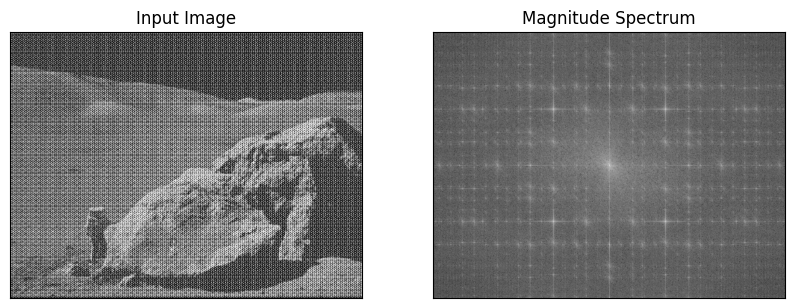

In [61]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
 
image = cv2.imread('periodic_noise.jpg', cv2.IMREAD_GRAYSCALE)
 
dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.figure(figsize=(10, 5))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [62]:
height, width = image.shape
mask = np.zeros((height,width,2),np.uint8)
centerX, centerY = (int(height / 2),int(width / 2))

std_dev = 50
num_points = 100000
points_x = np.random.normal(centerX, std_dev, num_points).astype(int)
points_y = np.random.normal(centerY, std_dev, num_points).astype(int)

mask[points_x, points_y,:] = 1

In [63]:
dft_shift_filtered = dft_shift*mask
f_ishift = np.fft.ifftshift(dft_shift_filtered)
img_back_tmp = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back_tmp[:,:,0],img_back_tmp[:,:,1])

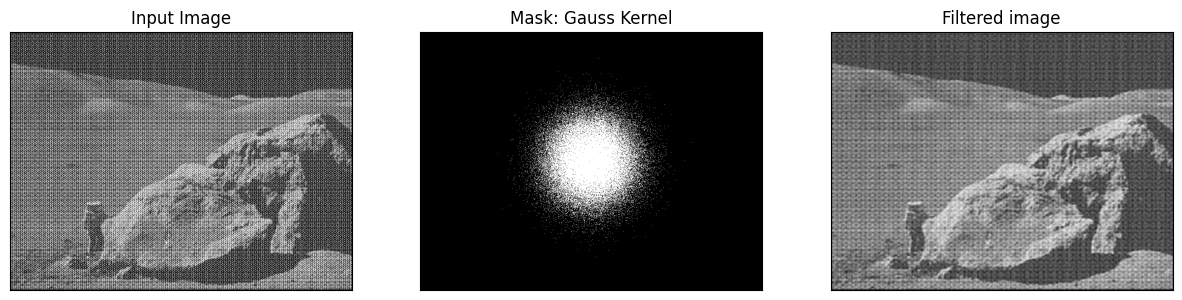

In [64]:
plt.figure(figsize=(15, 5))
plt.subplot(131),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(mask[:,:,0], cmap = 'gray')
plt.title('Mask: Gauss Kernel'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

In [65]:
image = cv2.imread('periodic_noise.jpg', cv2.IMREAD_GRAYSCALE)
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))

In [66]:
threshold = 0.65 * np.max(magnitude_spectrum)
peaks = (magnitude_spectrum > threshold)
height, width = image.shape
centerX, centerY = (int(height / 2),int(width / 2))
mask = np.zeros_like(magnitude_spectrum, dtype=np.int16)
hold = 30
mask[centerX - hold:centerX + hold, centerY - hold:centerY + hold] = 1

In [67]:
peaks[mask>0] = 0
f_transform_shifted[peaks] = 1
new_magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))

In [68]:
f_transform = np.fft.ifftshift(f_transform_shifted)
filtered_image = np.fft.ifft2(f_transform).real

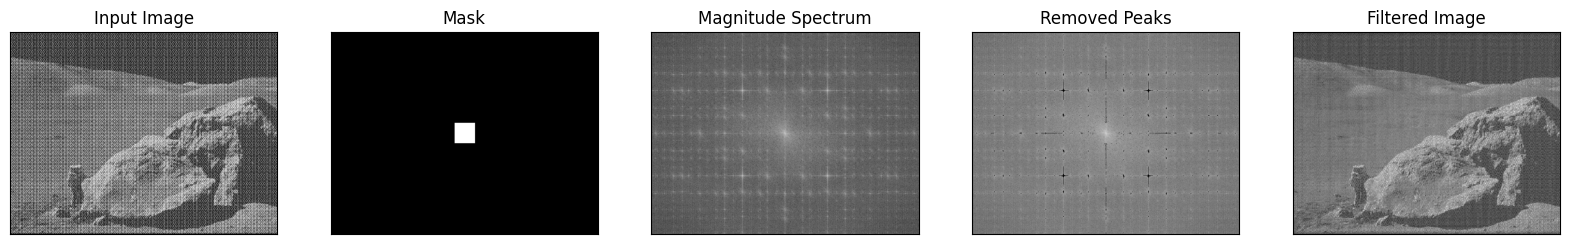

In [69]:
plt.figure(figsize=(20, 5))
plt.subplot(151), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(152), plt.imshow(mask, cmap='gray')
plt.title('Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(153), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(154), plt.imshow(new_magnitude_spectrum, cmap='gray')
plt.title('Removed Peaks'), plt.xticks([]), plt.yticks([])
plt.subplot(155), plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()